### 1. import package and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Data Analyst\Portfolio Project\Movie\movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


### 2. finding the missing data

In [5]:
# Amount of the missing data

for col in df.columns:
    no_missing = df[col].isnull().sum()
    print(f"{col} - {no_missing}")

name - 0
rating - 77
genre - 0
year - 0
released - 2
score - 3
votes - 3
director - 0
writer - 3
star - 1
country - 3
budget - 2171
gross - 189
company - 17
runtime - 4


In [6]:
# Percent of missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


### 3. Data types for columns

In [7]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
df.year.min(), df.year.max()

(1980, 2020)

In [9]:
# Remove rows with either empty budget or gross
df.dropna(subset=['budget','gross'], inplace = True)

# Convert some columns into data type of integer 'int64' for better reading
df["budget"] = df["budget"].astype('int64')
df["gross"] = df["gross"].astype('int64')

In [10]:
df.shape

(5436, 15)

In [11]:
# let's see if we have any missing values
# amount of missing data reduced

for col in df.columns:
    no_missing = df[col].isnull().sum()
    print(f"{col} - {no_missing}")

name - 0
rating - 12
genre - 0
year - 0
released - 0
score - 0
votes - 0
director - 0
writer - 0
star - 0
country - 1
budget - 0
gross - 0
company - 2
runtime - 1


In [12]:
# Change type of gross and budget

"${:,.0f}".format(df['gross'].min()), "${:,.0f}".format(df['gross'].max())

('$309', '$2,847,246,203')

In [13]:
"${:,.0f}".format(df['budget'].min()), "${:,.0f}".format(df['budget'].max())

('$6,000', '$356,000,000')

In [14]:
# find amount of movie in 2020
temp_df = df.loc[(df['year'] == 2020),].sort_values(['gross'], ascending=False)
temp_df[['year','name','gross','budget']]


,year,name,gross,budget
7652,2020,The Eight Hundred,461421559,80000000
7648,2020,Bad Boys for Life,426505244,90000000
7643,2020,Tenet,363656624,205000000
7649,2020,Sonic the Hedgehog,319715683,85000000
7650,2020,Dolittle,245487753,175000000
7645,2020,Birds of Prey,201858461,84500000
7646,2020,The Invisible Man,143151000,7000000
7651,2020,The Call of the Wild,111105497,135000000


In [190]:
# The amount of movies in 2020 are 8
temp_df.shape

(8, 15)

In [15]:
 # Sort the gross ascending
df1 = df.sort_values(['gross'], ascending=False)
df1[['year','name','gross','budget']]

df1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [16]:
pd.set_option('display.max_rows', None)

In [17]:
# Drop any duplicates, to remove the company duplicate
# Choose one name of one company

df['company'].drop_duplicates().sort_values(ascending=False)
df['company'].head()

0          Warner Bros.
1     Columbia Pictures
2             Lucasfilm
3    Paramount Pictures
4        Orion Pictures
Name: company, dtype: object

In [18]:
df['released'].astype(str)
df['released'].head()

0    June 13, 1980 (United States)
1     July 2, 1980 (United States)
2    June 20, 1980 (United States)
3     July 2, 1980 (United States)
4    July 25, 1980 (United States)
Name: released, dtype: object

In [195]:
year_correct = lambda year:year.split('(')[0]
df['yearmoving'] = df['released'].apply(year_correct)

In [196]:
df['yearcorrect'] = pd.to_datetime(df['yearmoving']).dt.year

In [197]:
df = df.drop(columns=['yearmoving'])

In [198]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [199]:
moving_col = df.pop('yearcorrect')
df.insert(4,'yearcorrect', moving_col)

In [200]:
df.head()

,name,rating,genre,year,yearcorrect,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [19]:
df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [202]:
pd.set_option('display.max_row', None)

In [20]:
#drop any duplicates

df.drop_duplicates()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


# Hypothesis: budget high correlation
# company high correlation

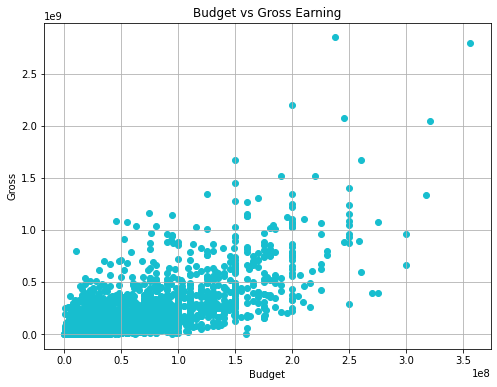

In [22]:
#scatter plot with budget and gross

fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
ax.set_xlabel('Budget')
ax.set_ylabel('Gross')
plt.title("Budget vs Gross Earning")
plt.scatter(x=df['budget'], y=df['gross'], c='#17becf')
plt.grid()

plt.show()

### Plot budget vs gross swing seaborn

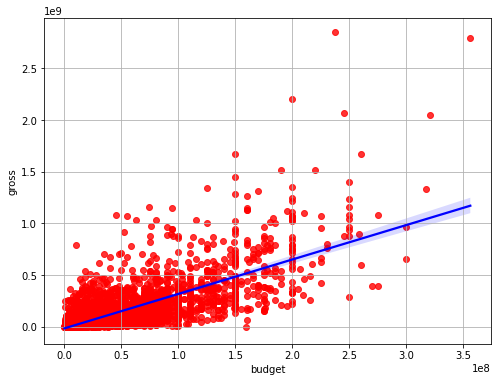

In [23]:
fig = plt.figure(figsize=(8, 6))
plt.grid()
ax = sns.regplot(x='budget',y='gross',data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

### Let's start looking at correlation

In [24]:
cereal_corr = df.corr()
cereal_corr

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


In [25]:
ones_corr = np.ones_like(cereal_corr, dtype=bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

In [26]:
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True]])

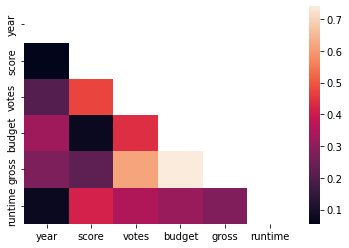

In [27]:
sns.heatmap(data=cereal_corr, mask=mask);

In [28]:
adjusted_mask = mask[1:,:-1]
adjusted_mask

array([[False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True],
       [False, False, False, False, False]])

In [29]:
adjusted_cereal_corr = cereal_corr.iloc[1:,:-1]

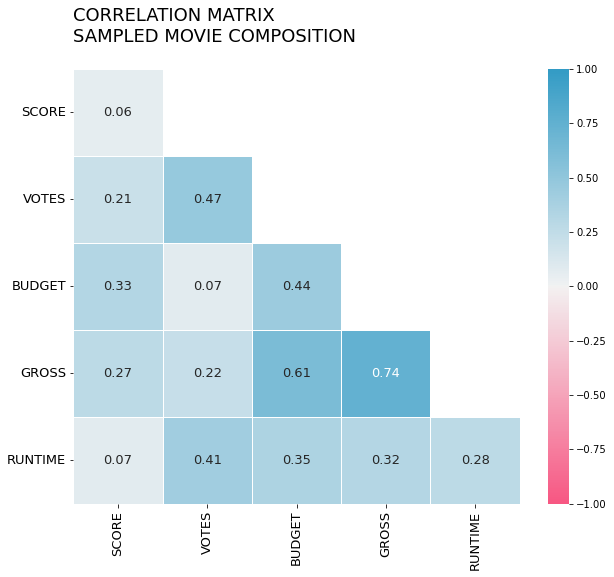

In [30]:
fig, ax=plt.subplots(figsize=(10,8))

cmap = sns.diverging_palette(0,230,90,60, as_cmap=True)

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask, 
            annot=True, fmt='.2f',annot_kws={'fontsize':13}, cmap=cmap,
           vmin=-1, vmax=1,
           linecolor='white', linewidths=0.5);

yticks = [i.upper()  for i in adjusted_cereal_corr.index]
xticks = [i.upper()  for i in adjusted_cereal_corr.columns]

ax.set_yticklabels(yticks, rotation=0, fontsize=13)
ax.set_xticklabels(yticks, rotation=90, fontsize=13)
title='CORRELATION MATRIX\nSAMPLED MOVIE COMPOSITION\n'
ax.set_title(title, loc='left', fontsize=18);

In [31]:
df_numerize = df.copy()

for col_name in df_numerize.columns:
    if (df_numerize[col_name].dtype=='object'):
        df_numerize[col_name] = df_numerize[col_name].astype('category')
        df_numerize[col_name] = df_numerize[col_name].cat.codes
        
df_numerize.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4706,6,6,1980,1308,8.4,927000.0,1800,2841,700,46,19000000,46998772,1432,146.0
1,3943,6,1,1980,1131,5.8,65000.0,1581,1160,215,47,4500000,58853106,454,104.0
2,3654,4,0,1980,1363,8.7,1200000.0,759,1822,1161,47,18000000,538375067,949,124.0
3,205,4,4,1980,1131,7.7,221000.0,891,1416,1478,47,3500000,83453539,1114,88.0
4,734,6,4,1980,1174,7.3,108000.0,721,352,272,47,6000000,39846344,1089,98.0


In [32]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


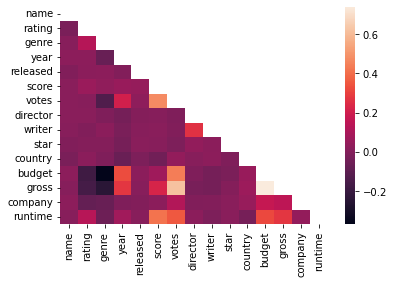

In [33]:
cereal_corr1 = df_numerize.corr()
ones_corr = np.ones_like(cereal_corr1, dtype=bool)
ones_corr
mask = np.triu(ones_corr)
mask
sns.heatmap(data=cereal_corr1, mask=mask);

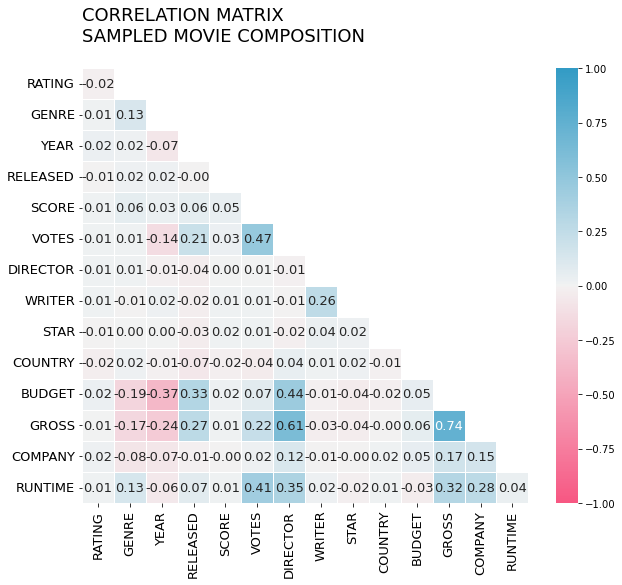

In [34]:
adjusted_mask = mask[1:,:-1]
adjusted_mask
adjusted_cereal_corr = cereal_corr1.iloc[1:,:-1]


fig, ax=plt.subplots(figsize=(10,8))

cmap = sns.diverging_palette(0,230,90,60, as_cmap=True)

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask, 
            annot=True, fmt='.2f',annot_kws={'fontsize':13}, cmap=cmap,
           vmin=-1, vmax=1,
           linecolor='white', linewidths=0.5);

yticks = [i.upper()  for i in adjusted_cereal_corr.index]
xticks = [i.upper()  for i in adjusted_cereal_corr.columns]

ax.set_yticklabels(yticks, rotation=0, fontsize=13)
ax.set_xticklabels(yticks, rotation=90, fontsize=13)
title='CORRELATION MATRIX\nSAMPLED MOVIE COMPOSITION\n'
ax.set_title(title, loc='left', fontsize=18);

In [35]:
corr_pairs = df_numerize.corr().unstack()
sorted_pairs = corr_pairs.sort_values()

high_corr =sorted_pairs[(sorted_pairs) >0.5]
high_corr

gross     votes       0.614904
votes     gross       0.614904
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64